In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 是一个魔法属性，内嵌绘图
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

2022-07-19 21:25:50.038712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 21:25:50.038756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [8]:
# fashion_mnist图像分类数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
print(x_train_all.shape)
print('-'*50)
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_train.shape, y_train.shape)  # 训练集，后55000个样本
print(x_valid.shape, y_valid.shape)  # 验证集，前5000个样本
print(x_test.shape, y_test.shape)  # 测试集

(60000, 28, 28)
--------------------------------------------------
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [9]:
# 784个特征
28*28

784

In [10]:
type(x_train)

numpy.ndarray

In [14]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,  44,  55,  96, 201,  35,   0,
          0,   0,   0,   0,  60, 184,  53,  50,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  91, 104,  83,  44, 179, 243, 214,
        156, 148, 212, 248, 255, 184,  40,  86, 109,  78,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  75, 142,  50,  75,  60,  21,  98, 212,
        223, 187, 232, 212,  94,   4,  57,  65,  55, 143,  71,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 107, 135,  93,  63,  63,  55,  27,  29,
         98, 112,  58,  37,  19,  53,  58,  60,  88, 122, 112,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 155, 116, 106,  71,  62,  49,  63,  49,
         34,  31,  35,  50,  63,  55,  58,  65, 109, 114, 150,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 147, 138,  99,  96,  63,  62,  53,  37,
         47,  49,  27,  32,  50,  57,  65,  80, 106, 135, 152,   1,   0,
          0,   0],
       [  

In [11]:
# target是sparse编码
y_train[0]

4

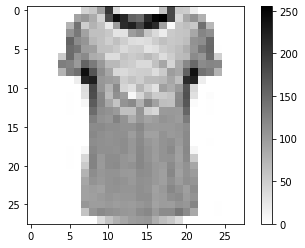

184


In [17]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.colorbar()  # 在旁边显示一条色阶条
    plt.show()
show_single_image(x_train[1])
print(x_train[1, 0, 18])

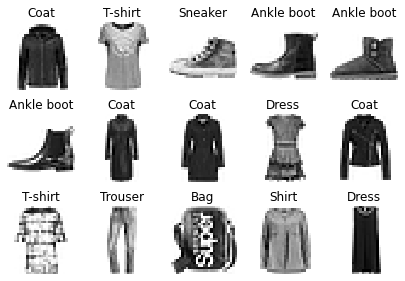

In [18]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)  # x和y的样本数一致
    assert n_rows * n_cols < len(x_data)  # 确保打印的图片小于总样本数
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))  # 宽1.4，高1.6
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1) # 因为从1开始
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off') # 去除坐标系
            plt.title(class_names[y_data[index]])
    plt.show()
# 已知的图片类别
# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
# 打印前15个样本
show_imgs(3, 5, x_train, y_train, class_names)

In [23]:
# tf.keras.models.Sequential()
# 功能：Sequential将线性的层堆叠到一个tf.keras.Model

model = keras.models.Sequential()
# 把28*28的图片展平为一个一维向量
model.add(keras.layers.Flatten(input_shape=[28, 28]))
print(model.output_shape)
# Dense是全连接层，添加全连接层
# Dense(units,activation=None,**kwargs)
#       units:神经元个数
#       activation：激活函数
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])



# reason for sparse: y->index. y->one_hot->[] 
# loss是损失函数 y如果只是一个数，那么使用sparse_categorical_crossentropy
# sparse_categorical_crossentropy计算稀疏分类crossentropy损失
# 计算的分类值是 0,1,2,...9
# 如果是一个向量，那么使用categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",  # 损失函数
              optimizer = keras.optimizers.SGD(0.001),  # 内置优化器，SGD为梯度下降优化器
              metrics = ["accuracy"])  # 模型在训练和测试期间要评估的指标列表

(None, 784)


In [24]:
# 层数
model.layers

In [27]:
# 每一层中的参数个数
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
784*300+300  # 300是偏置

235500

In [30]:
300*100+100

30100

In [31]:
100*10+10

1010

In [32]:
# 模型中自己训练的参数
model.variables

[<tf.Variable 'dense_12/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[-0.02858496, -0.01207971, -0.04638882, ..., -0.00167204,
          0.03135744, -0.06730996],
        [ 0.01672873,  0.04578949,  0.05851021, ...,  0.04783885,
         -0.04770028,  0.0210005 ],
        [ 0.06374399, -0.03815441, -0.04272866, ...,  0.05554517,
         -0.03999726, -0.00784895],
        ...,
        [ 0.0663545 , -0.06535651, -0.01285322, ...,  0.02345797,
         -0.04374214,  0.00517704],
        [ 0.03831077, -0.06373314, -0.0518935 , ...,  0.02098108,
          0.02493777,  0.0685232 ],
        [-0.02344242, -0.03383997, -0.0488357 , ..., -0.04332443,
          0.01857964,  0.02862035]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [33]:
model.variables[0].numpy().max()

0.07439786

In [34]:
# 训练
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 3.0486 - accuracy: 0.7178 - val_loss: 0.6676 - val_accuracy: 0.7738
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5742 - accuracy: 0.7986 - val_loss: 0.6004 - val_accuracy: 0.7952
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5066 - accuracy: 0.8185 - val_loss: 0.5646 - val_accuracy: 0.8048
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4697 - accuracy: 0.8295 - val_loss: 0.5053 - val_accuracy: 0.8270
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4439 - accuracy: 0.8356 - val_loss: 0.5281 - val_accuracy: 0.8204
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4252 - accuracy: 0.8423 - val_loss: 0.4921 - val_accuracy: 0.8380
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4125 - accuracy: 0.8473 - val_loss: 0.4787 - val_accuracy:

In [35]:
type(history)

keras.callbacks.History

In [36]:
history.history

{'loss': [3.0486373901367188,
  0.5741677284240723,
  0.5065876841545105,
  0.4697172939777374,
  0.44386354088783264,
  0.4251674711704254,
  0.41248786449432373,
  0.39861756563186646,
  0.39080142974853516,
  0.38060998916625977,
  0.37383225560188293,
  0.36578643321990967,
  0.36157530546188354,
  0.35460036993026733,
  0.34959739446640015,
  0.344049870967865,
  0.3389741778373718,
  0.33553546667099,
  0.33079102635383606,
  0.3256438970565796],
 'accuracy': [0.7178000211715698,
  0.7986181974411011,
  0.8185272812843323,
  0.8295272588729858,
  0.8356363773345947,
  0.8422909379005432,
  0.8473454713821411,
  0.8519636392593384,
  0.8549273014068604,
  0.8585454821586609,
  0.8592545390129089,
  0.8624363541603088,
  0.8656908869743347,
  0.8667818307876587,
  0.8690545558929443,
  0.8713454604148865,
  0.871963620185852,
  0.8745272755622864,
  0.8773454427719116,
  0.8776181936264038],
 'val_loss': [0.6676291823387146,
  0.6004212498664856,
  0.5646458268165588,
  0.505322456

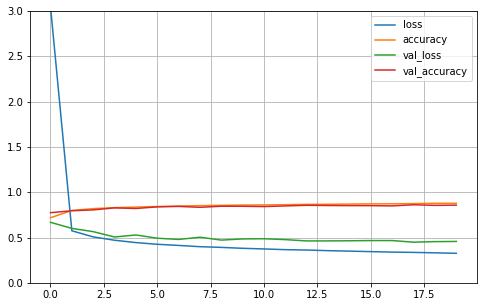

In [37]:
# 绘图
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))  # 使用df中的折线图绘制
    plt.grid(True)  # 网格线
    plt.gca().set_ylim(0, 3)  # 纵坐标的刻度范围，注意损失不一定在0-1之间
    plt.show()

plot_learning_curves(history)  # 横坐标是epochs

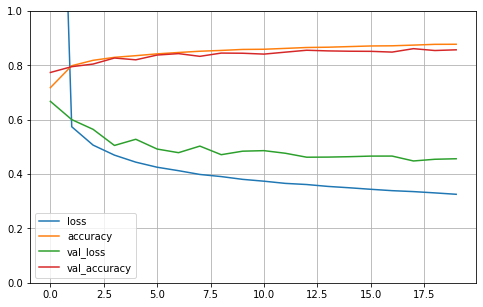

In [38]:
# 绘图，缩小纵坐标范围，利于观察
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))  # 使用df中的折线图绘制
    plt.grid(True)  # 网格线
    plt.gca().set_ylim(0, 1)  # 纵坐标的刻度范围，注意损失不一定在0-1之间
    plt.show()

plot_learning_curves(history)  # 横坐标是epochs

In [39]:
# 在测试集上评估，一个是测试集的损失，一个是测试集的准确率
model.evaluate(x_test, y_test, verbose=0)

[0.4575308561325073, 0.8414999842643738]

# 一些计算

In [41]:
# 理解交叉熵
# 计算标签和预测之间的crossentropy（交叉熵）损失
cce = keras.losses.SparseCategoricalCrossentropy()
loss = cce(
  [0, 1, 2],
  [[.9, .05, .05], [.05, .89, .06], [.05, .01, .94]])
print('Loss: ', loss.numpy())

Loss:  0.09458992


In [42]:
# 理解交叉熵
#   [0, 1, 2],
#   [[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]]
input1=[[.9, .05, .05], [.05, .89, .6], [.05, .01, .94]]
total=0.0
i=input1[0]
print(i)
print(-(1*np.log(i[0])+0*np.log(i[1])+0*np.log(i[2])))
i=input1[1]
print(i)
print(-(0*np.log(i[0])+1*np.log(i[1])+0*np.log(i[2])))
i=input1[2]
print(i)
print(-(0*np.log(i[0])+0*np.log(i[1])+1*np.log(i[2])))

[0.9, 0.05, 0.05]
0.10536051565782628
[0.05, 0.89, 0.6]
0.11653381625595151
[0.05, 0.01, 0.94]
0.06187540371808753


In [43]:
# 理解交叉熵
(0.10536051565782628+0.11653381625595151+0.06187540371808753)/3

0.09458991187728844

In [44]:
# 计算softmax
z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
m = np.exp(z)/sum(np.exp(z))
m

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])